## 2) Análisis de sentimiento en Opiniones de Películas



In [4]:
import urllib.request as urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train" #URL of the training set, Lower casing stop word removal and stemming already done
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev" #URL of the testing set
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text']) #Construction of the DF with sentiment and text as columns
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print(train_df.shape)
print(test_df.shape)
stest = test_df['Sentiment']
positivcount = 0
for i in range(0,test_df.shape[0]): #for every data of the test set 
        if stest[i] == 1:           
            positivcount += 1       #If positive value positivecount in incremented 
negativecount = test_df.shape[0]-positivcount #negativevalue is the difference between the size of the dataset and positivecount
print("The testing set got {} negative review and {} positive review").format(negativecount, positivcount)
strain = train_df['Sentiment']
positivcount = 0
for i in range(0,train_df.shape[0]):
        if strain[i] == 1:
            positivcount += 1
negativecount = test_df.shape[0]-positivcount
print("The training set got {} negative review and {} positive review").format(negativecount, positivcount)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 671: invalid continuation byte

In [30]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

 ( love ) ? eat cake
 love eat cake
 love eat cake
 not love eat cake
-----------------------------------------
 ( love ) ? , eat cake ?
 love eating cake
 loved eating cake
 not love eating cake


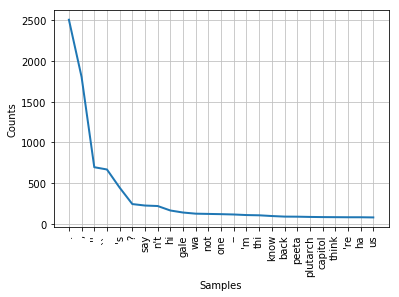

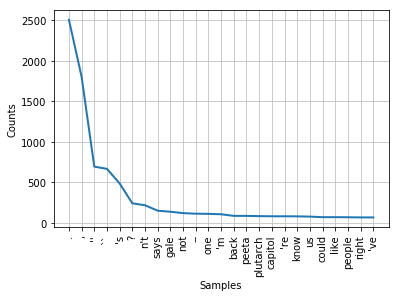

In [92]:
import re, time
from nltk.book import *
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ ps.stem(word.lower()) \
                for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
                words+=" "+word
    return words
def word_extractorbis(text):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ word.lower() \
                for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
                words+=" "+word
    return words

print word_extractor("I (LOve) to? eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
f=open('Mockingjay.txt','rU')
raw=f.read()

print("-----------------------------------------")
print word_extractorbis("I (LOve) to?, eat cake ?")
print word_extractorbis("I love eating cake")
print word_extractorbis("I loved eating the cake")
print word_extractorbis("I do not love eating cake")

"""
In the next part we will see the effects of stemming on a large text (the mockingjay) by analysing 
the lexical frequency.

"""

texttoread = word_extractor(raw)
tokens = nltk.word_tokenize(texttoread)
texttoread = nltk.Text(tokens)
fdist = nltk.FreqDist(texttoread)
fdist.plot(25) 

texttoread = word_extractorbis(raw)
tokens = nltk.word_tokenize(texttoread)
texttoread = nltk.Text(tokens)
fdist = nltk.FreqDist(texttoread)
fdist.plot(25) 



In [3]:
def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) \
                for word in word_tokenize(text.decode('utf-8','ignore')) ]
    for word in wordtokens:
            if word not in commonwords:
                words+=" "+word
    return words


review ="Still following? As Cobb prepares to pull this stunt a second (third?) time, dream rookie Ariadne (Ellen Page) says what's probably on your mind: Wait - whose subconscious are we going into The only person who truly knows is Christopher Nolan, the writer, director and producer of this enormously entertaining film. Whatever your questions - Why do dream bullets hurt? Can you kill yourself? How long is a dream minute? - Nolan has the answers, though theyre too much fun to spoil here. And woven into the multilayered story is a subplot involving Cobbs not-quite-dead wife, movingly played by Marion Cotillard, which is nearly intricate enough for its own movie. As with The Dark Knight (2008), Nolan turns the humblest of genres - in this case, a sci-fi-caper combo - into something approaching a masterpiece. Inception is one astounding set-piece after another: free-falling bodies, fistfights in a whirling hallway, a symbolically crumbling Arctic fortress, all strobing together in nested sequence. (Lee Smith, Nolan's longtime editor, is the movie's secret weapon.) The characters do a lot of explaining and defining - perhaps unavoidably in a world this detailed - and the film isn't above resorting to a little computer-generated sleight-of-hand. Mostly, though, Inception manages to amaze by simply outsmarting, outpacing and genuinely surprising its audience. That's a treat, and one moviegoers don't experience often enough."
f=open('Mockingjay.txt','rU')
raw=f.read()
texttoread = word_extractor(raw)
tokens = nltk.word_tokenize(texttoread)
texttoread = nltk.Text(tokens)
fdist = nltk.FreqDist(texttoread)
fdist.plot(25) 


NameError: name 'word_extractor' is not defined

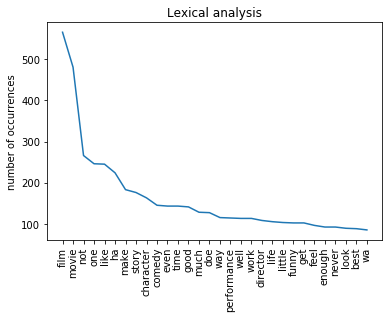

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
tabtag = list()
i=0
x = np.arange(30)
distsorted = sorted(dist, reverse=True) 
distsortedindex = sorted(range(len(dist)), key=lambda k: dist[k],reverse=True)
for count in distsortedindex:
    tabtag.append(vocab[count]) 
    i = i+1
#print tabtag

y = distsorted[:30]
my_xticks = tabtag
plt.xticks(x, my_xticks,  rotation='vertical')
plt.ylabel('number of occurrences')
plt.title('Lexical analysis')
plt.plot(x, y)
plt.show()




        
    
    
    


In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))
    
xt = [0, 1, 0, 1, 0]
yt = [1, 1, 0, 1, 1]
x = [0, 1, 0, 1, 1]
y = [1, 1, 0, 1, 1]
target_names = ['class 0', 'class 1']
score_the_model(model,x,y,xt,yt,"SVM")  



NameError: name 'model' is not defined

In [ ]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

In [228]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
do_SVM(features_train,labels_train,features_test,labels_test)

C Value: 0.010000
Training Accuracy SVM: 0.886044
Test Accuracy SVM: 0.716296
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

C Value: 0.100000
Training Accuracy SVM: 0.989871
Test Accuracy SVM: 0.724740
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C Value: 10.000000
Training Accuracy SVM: 1.000000
Test Accuracy SVM: 0.705038
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.69      0.70      1803
          -       0.69      0.72      0.71      1751

avg / total       0.71      0.71      0.71      3554

C Valu